# **Mobile Price Classification**

## **## Name: R B Ch S Tarun**


**Target: Identifying the Price Of the mobiles from the given specifications.**




## **USE CASES:**
*   This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
*   it will be usefull for Consumers to verify that they are paying best price for a mobile.



**Importing Packages And Dataset**

In [ ]:

import pandas as pd
import numpy as np

import seaborn as ns
import matplotlib.pyplot as plt
%matplotlib inline

#importing packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/ML_Lab/Mobilestrain.csv")
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


## **Analyzing the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Checking weather dataset having null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# talk time is not needed for classification

data = data.drop("talk_time",axis =1)

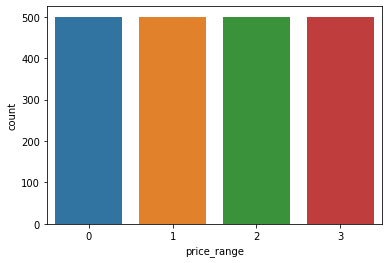

In [ ]:
# Checking weather the data is balanced or unbalenced

import seaborn as sns
sns.countplot(x="price_range", data=data)

In [ ]:
data.price_range.unique()

array([1, 2, 3, 0])

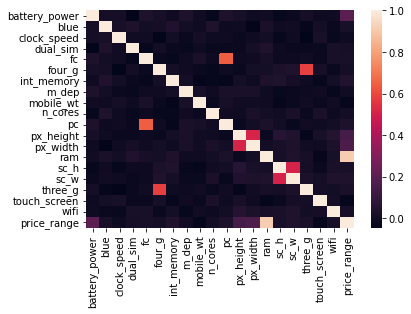

In [ ]:
# Generating heatmap to see the corelation among the data
sns.heatmap(data.corr())

How does ram is affected by price

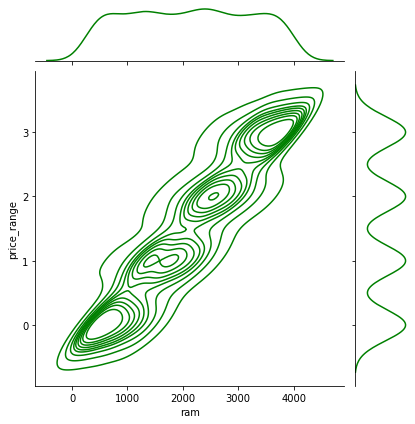

In [ ]:
sns.jointplot(x='ram',y='price_range',data=data,color='green',kind='kde');

Phones which support 4g

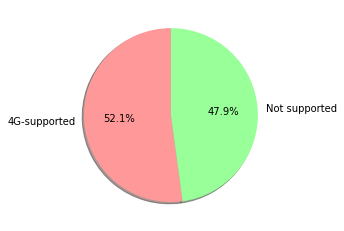

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = data['four_g'].value_counts().values
colors = ['#ff9999','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',colors=colors,shadow=True,startangle=90)
plt.show()

## **Trying Differnet Methods To Build A Model**

Model Building


*   Logistic Regression
*   Support Vector Classification(SVM)
*   Naive Bayes
*   ID3 Decision Tree Classifier





## **Logestic Regression**

In [ ]:
# Creating & Training Logestic Regression Model

features = data.loc[:,["battery_power","int_memory", "ram","sc_w"]].values
label = data.iloc[:,-1].values


X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=167)

classimodel= LogisticRegression(solver="liblinear")  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  



In [ ]:
print("test score: {}".format(testscore),'\n')
y_predlogi =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))

test score: 0.782 

 f1 score:  0.782 

[[124   8   0   0]
 [ 10  75  24   0]
 [  0  23  54  42]
 [  0   0   2 138]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.782 

 recall score:  0.782 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       132
           1       0.71      0.69      0.70       109
           2       0.68      0.45      0.54       119
           3       0.77      0.99      0.86       140

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.76       500
weighted avg       0.77      0.78      0.77       500



## **Support Vector Classification(SVM)**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=39) 

In [ ]:
svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)  

print("test score: {} ".format(testscore),'\n')

test score: 0.864  



In [ ]:
y_predsvc =  svcmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predsvc,average='micro'),'\n')
print(confusion_matrix(y_test, y_predsvc))

 f1 score:  0.864 

[[133   6   0   0]
 [ 12  94   9   0]
 [  0  13  97  11]
 [  0   0  17 108]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predsvc,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predsvc,average='micro'),'\n')
print(classification_report(y_test, y_predsvc))

 precision score:  0.864 

 recall score:  0.864 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       139
           1       0.83      0.82      0.82       115
           2       0.79      0.80      0.80       121
           3       0.91      0.86      0.89       125

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



## **Navie Bayes**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=120) 

In [ ]:
NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 


GaussianNB()

In [ ]:
trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

In [ ]:
print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_predNB =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNB,average='micro'),'\n')
print(confusion_matrix(y_test, y_predNB))

test score: 0.818 train score: 0.7646666666666667 

 f1 score:  0.818 

[[113  11   0   0]
 [ 16  82  18   0]
 [  0  16  90  18]
 [  0   0  12 124]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predNB,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predNB,average='micro'),'\n')
print(classification_report(y_test, y_predNB))

 precision score:  0.818 

 recall score:  0.818 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       124
           1       0.75      0.71      0.73       116
           2       0.75      0.73      0.74       124
           3       0.87      0.91      0.89       136

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



## **ID3 Decision Tree Classifier**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=194)

In [ ]:
DTmodel=  DecisionTreeClassifier(max_depth=4)  
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)
y_predDT =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test, y_predDT))

 f1 score:  0.834 

[[121  11   0   0]
 [ 12 102  21   0]
 [  0  12  91  10]
 [  0   0  17 103]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))

 precision score:  0.834 

 recall score:  0.834 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       132
           1       0.82      0.76      0.78       135
           2       0.71      0.81      0.75       113
           3       0.91      0.86      0.88       120

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.84       500



## **Analyzing The AUC and Accuracy of different models**



In [ ]:
# Logestic Regression

probabilityValues = classimodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')

print("Logestic Regression AUC",auc)

# Support Vector Classification

probabilityValues = svcmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')

print("Support Vector Classification AUC ",auc)
# Naive Bayes

probabilityValues = NBmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')

print("Naive Bayes AUC ",auc)

# ID3 Decision Tree
probabilityValues = DTmodel.predict_proba(features)
auc = roc_auc_score(label,probabilityValues,multi_class ='ovr')
print("ID3 AUC ",auc)


Logestic Regression AUC 0.9366080000000001
Support Vector Classification AUC  0.964942
Naive Bayes AUC  0.9429046666666667
ID3 AUC  0.9551051666666667


## **Analyzing The Results**
### **Logistic Regression**
* Accuracy: 0.78
* AUC: 0.9366080000000001
### **Support Vector Classification(SVM)**
* Accuracy: 0.86
* AUC: 0.9649396666666666
### **Naive Bayes**
* Accuracy: 0.82
* AUC: 0.9429046666666667
### **ID3 Decision Tree Classifier**
* Accuracy: 0.83       
* AUC: 0.9551051666666667

# Conclusion
***I will choose Support Vector Machine algorithm for this test-dataset.***

# **Applying Algorithm To Test Data**

In [ ]:
# Loading The Dataset
testdata = pd.read_csv('/content/gdrive/MyDrive/ML_Lab/Mobiletest.csv')

In [ ]:
finaltestdata = testdata.loc[:,["battery_power","int_memory", "ram","sc_w"]]

In [ ]:
predicted_price = svcmodel.predict(finaltestdata)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
testdata['price_range']=predicted_price

In [ ]:
testdata.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
